In [ ]:
!python -m pip install --upgrade pip

!pip install tensorflow==2.13.0 

!pip install tensorboard==2.4.1
!pip install torch  #YOLOv5 runs on top of PyTorch, so we need to import it to the notebook

In [ ]:
import torch # YOLOv5 implemented using pytorch

In [ ]:
from IPython.display import Image #this is to render predictions

In [ ]:
#!git clone https://github.com/ultralytics/yolov5

In [1]:
%cd yolov5

/Users/ruppikha/Desktop/YoloV5/yolov5


In [6]:
!pip install -r requirements.txt

In [7]:
import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = '/Users/ruppikha/Desktop/YoloV5/Dataset/images/train'
valPath = '/Users/ruppikha/Desktop/YoloV5/Dataset/images/val'
crsPath = '/Users/ruppikha/Desktop/YoloV5/archive/ts/ts' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)


training images are :  592
Validation images are :  148


In [8]:
trainimagePath = '/Users/ruppikha/Desktop/YoloV5/Dataset/images/train'
trainlabelPath = '/Users/ruppikha/Desktop/YoloV5/Dataset/labels/train'
valimagePath = '/Users/ruppikha/Desktop/YoloV5/Dataset/images/val'
vallabelPath = '/Users/ruppikha/Desktop/YoloV5/Dataset/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath) 

'/Users/ruppikha/Desktop/YoloV5/Dataset/images/val/ts'

In [6]:
!python /Users/ruppikha/Desktop/YoloV5/yolov5/train.py --img 415 --batch 16 --epochs 30 --data /Users/ruppikha/Desktop/YoloV5/yolov5/dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/Users/ruppikha/Desktop/YoloV5/yolov5/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-193-g485da42 Python-3.11.3 torch-2.0.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, h

                 Class     Images  Instances          P          R      mAP50   
                   all        889        243     0.0549      0.234      0.042      0.016

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       7/29         0G    0.05508   0.009846    0.02484         69        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        889        243     0.0673       0.35     0.0558     0.0233

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       8/29         0G    0.05624   0.008988    0.02192         50        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        889        243     0.0956      0.373     0.0719     0.0301

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       9/29         0G    0.05439   0.009148    0.02013         47        416: 1
          

                 yield        889         51      0.176      0.745      0.199      0.131
             mandatory        889         31      0.162      0.645      0.146     0.0852
                 other        889         61      0.178      0.623      0.152     0.0946
Results saved to yolov5/runs/train/exp3


In [13]:
ls /Users/ruppikha/Desktop/YoloV5/yolov5/train.py

/Users/ruppikha/Desktop/YoloV5/yolov5/train.py


In [12]:
#pip install ultralytics

In [8]:
#!pip install tensorboard==2.13.0

In [9]:
#pip install numpy==1.24.3

In [10]:
#pip install protobuf==3.20.3

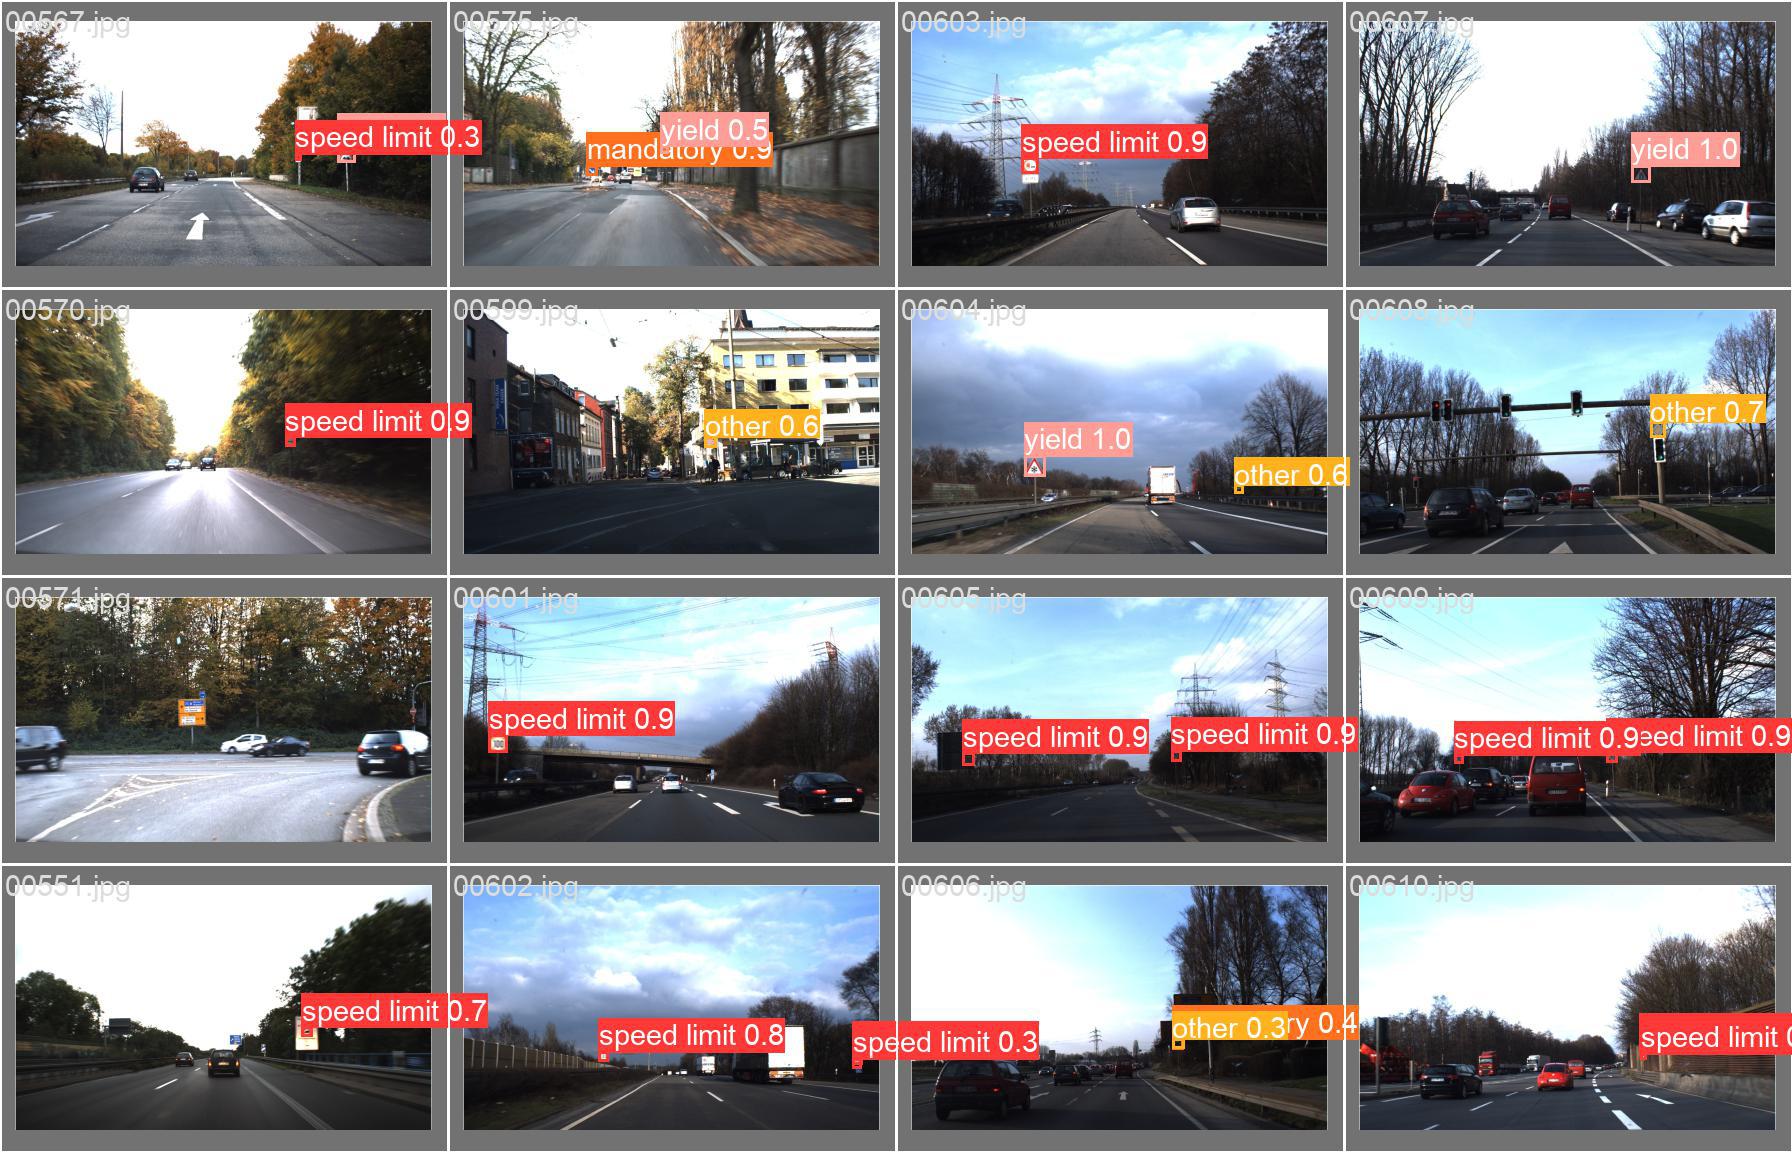

In [31]:
from keras.preprocessing import image 
image.ImageDataGenerator()
image.load_img('/Users/ruppikha/Desktop/YoloV5/yolov5/runs/train/exp3/val_batch2_pred.jpg')

In [38]:
!python /Users/ruppikha/Desktop/YoloV5/yolov5/detect.py --source /Users/ruppikha/Desktop/YoloV5/yolov5/runs/train/exp3/a.jpg --weights /Users/ruppikha/Desktop/YoloV5/yolov5/runs/train/exp3/weights/best.pt

detect: weights=['/Users/ruppikha/Desktop/YoloV5/yolov5/runs/train/exp3/weights/best.pt'], source=/Users/ruppikha/Desktop/YoloV5/yolov5/runs/train/exp3/a.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-193-g485da42 Python-3.11.3 torch-2.0.1 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /Users/ruppikha/Desktop/YoloV5/yolov5/runs/train/exp3/a.jpg: 384x640 1 speed limit, 1 yield, 80.0ms
Speed: 0.2ms pre-process, 80.0ms inference, 0.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp4


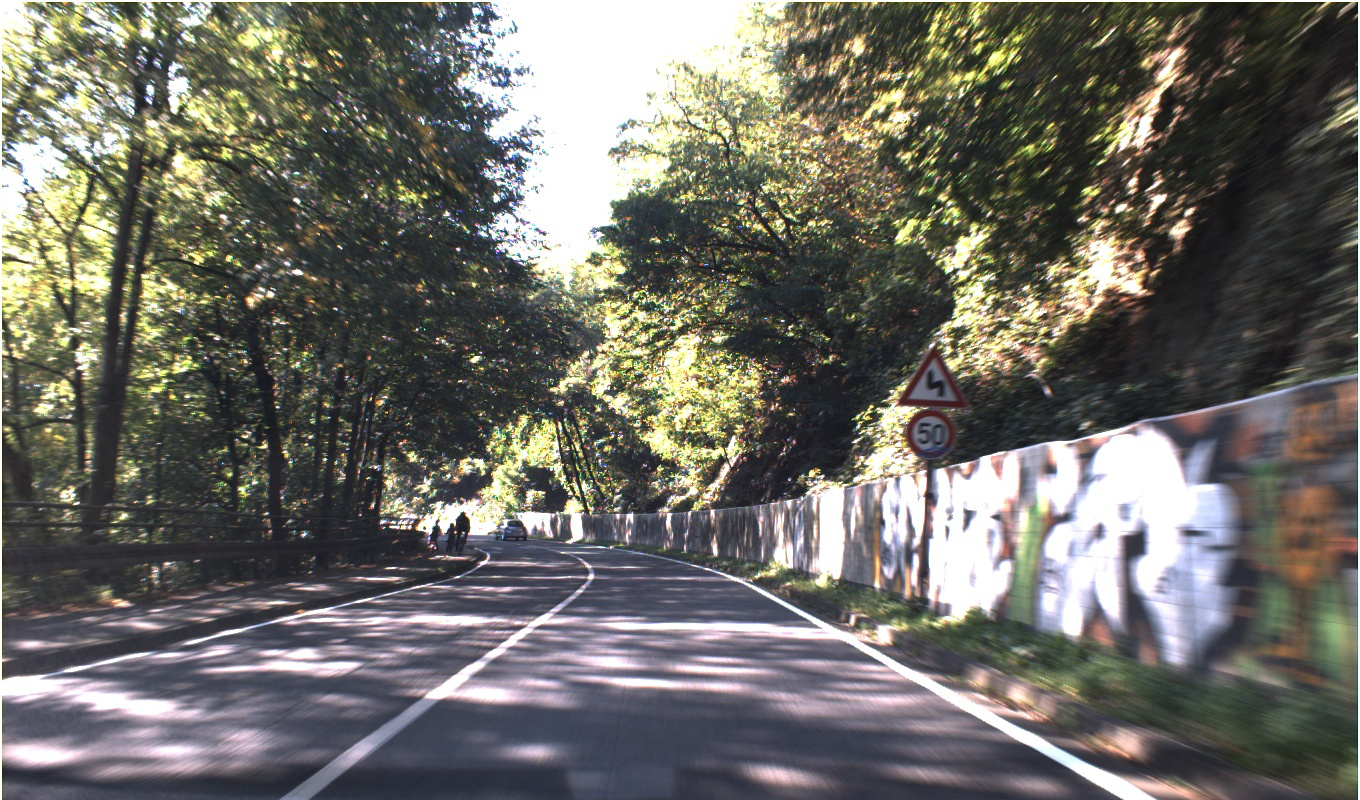

In [36]:
#Test Image Inputted
image.load_img('/Users/ruppikha/Desktop/YoloV5/yolov5/runs/train/exp3/a.jpg')

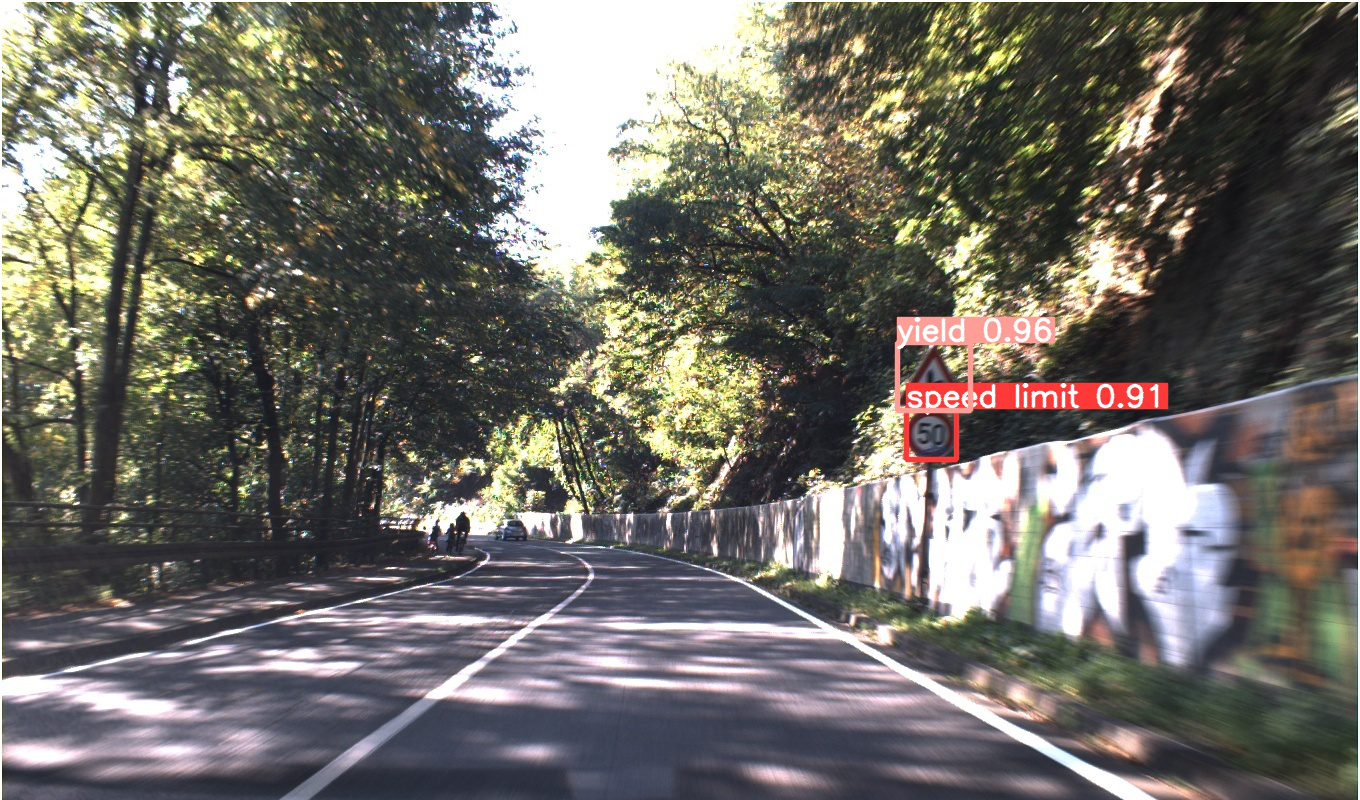

In [39]:
#Ouput given by YOLOV5 algorithm

image.load_img('/Users/ruppikha/Desktop/YoloV5/yolov5/runs/detect/exp4/a.jpg')